Facial Expression using CNN (transfer learning)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
directory = "drive/MyDrive/cnn3 images/train/"
classes  = ["0","1","2","3","4","5","6"]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


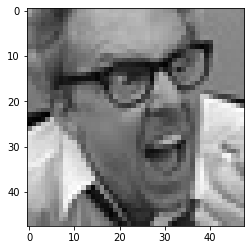

In [40]:
img = cv2.imread('drive/MyDrive/cnn3 images/train/0/Training_3908.jpg')
plt.imshow(img)

## Reading all images,resizing and then converting them into array

In [4]:
train_data = []
def create_train_data():
    for category in classes:
        path = os.path.join(directory,category)
        class_num = classes.index(category)  # for labels
        for img in os.listdir(path):
            try:
                img_array =  cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(224,224))   # resizing the image 
                train_data.append([new_array,class_num])
            except Exception as e:
                pass

In [5]:
create_train_data()

In [6]:
len(train_data)

908

In [7]:
import random
random.shuffle(train_data)
X=[]
y=[]
for features,labels in train_data:
  X.append(features)
  y.append(labels)
X = np.array(X).reshape(-1,224,224,3)  

In [8]:
X = X/255.0

In [9]:
y = np.array(y)

In [10]:
y.shape

(908,)

In [11]:
X.shape

(908, 224, 224, 3)

# Deep learning using training transfer learning model named MobileNetV2

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
model = tf.keras.applications.MobileNetV2() # pre trained model

14548992/14536120 [==============================] - 0s 0us/step


In [14]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [15]:
# transfer learning

In [16]:
base_input = model.layers[0].input
base_output = model.layers[-2].output

In [17]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation("relu")(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_output)

In [18]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [19]:
new_model = keras.Model(inputs = base_input,outputs = final_output)

In [20]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [21]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [22]:
new_model.fit(X,y,epochs=10)

Epoch 1/10
29/29 [==============================] - 169s 6s/step - loss: 1.9063 - accuracy: 0.2401
Epoch 2/10
29/29 [==============================] - 162s 6s/step - loss: 1.4439 - accuracy: 0.4581
Epoch 3/10
29/29 [==============================] - 164s 6s/step - loss: 1.0803 - accuracy: 0.5991
Epoch 4/10
29/29 [==============================] - 163s 6s/step - loss: 0.8352 - accuracy: 0.6938
Epoch 5/10
29/29 [==============================] - 168s 6s/step - loss: 0.6609 - accuracy: 0.7676
Epoch 6/10
29/29 [==============================] - 162s 6s/step - loss: 0.6006 - accuracy: 0.8018
Epoch 7/10
29/29 [==============================] - 162s 6s/step - loss: 0.5136 - accuracy: 0.8051
Epoch 8/10
29/29 [==============================] - 162s 6s/step - loss: 0.4472 - accuracy: 0.8524
Epoch 9/10
29/29 [==============================] - 163s 6s/step - loss: 0.3545 - accuracy: 0.8888
Epoch 10/10
29/29 [==============================] - 162s 6s/step - loss: 0.2870 - accuracy: 0.9042


In [23]:
new_model.save('mymodel.h5')

In [24]:
model = keras.models.load_model('mymodel.h5')

Now preparing the test data for accuracy

In [25]:
directory = "drive/MyDrive/cnn3 images/test/"

In [32]:
X_test =[]
y_test = []
def create_test():
    for category in classes:
        path = os.path.join(directory,category)
        class_num1 = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array1  = cv2.resize(img_array,(224,224))
                X_test.append(new_array1)
                y_test.append(class_num1)
            except Exception as e:
                pass

In [33]:
create_test()

In [34]:
len(test_data)

94

In [35]:
X_test = np.array(X_test).reshape(-1,224,224,3)
X_test = X_test/255


In [37]:
y_test = np.array(y_test)

In [38]:
predictiction = model.predict(X_test)

Now let us predict the any img from test data

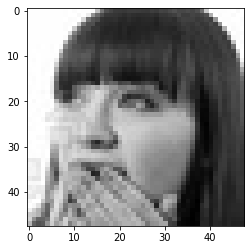

In [61]:
img = cv2.imread('drive/MyDrive/cnn3 images/test/6/PrivateTest_104142.jpg')
plt.imshow(img)

In [62]:
img_new=cv2.resize(img,(224,224))
img_new = np.expand_dims(img_new,axis=0)

In [63]:
img_new = img_new/255

In [65]:
np.argmax(model.predict(img_new))

6

So 6 was Surprise that means our model is working fine